In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
import random

class BaccaratGame(TypedDict):
    player_hand: List
    banker_hand: List
    player_score: int
    banker_score: int
    bet_choice: str
    choice: str 
    bet_amount: float
    payout: float
    balance: int
    next_step: str

def start_game(state: BaccaratGame) -> BaccaratGame:
    """ Initialize game state with user inputs."""
    print("Welcome to Simple Baccarat Game!")
    state["balance"] = int(input("Enter your starting balance: "))
    state["bet_amount"] = float(input("Enter your bet amount: "))
    return state

def check_balance(state: BaccaratGame) -> BaccaratGame:
    """ Check if the player has sufficient balance to place the bet."""
    if state["bet_amount"] > state["balance"]:
        print("Insufficient balance to place the bet.")
        state["bet_amount"] = float(input("Enter a valid bet amount: "))
    return state

def deal_cards(state: BaccaratGame) -> BaccaratGame:
    """ Deal two cards each to player and banker."""
    deck = [1,2,3,4,5,6,7,8,9,10,10,10,10] * 4  # Simplified deck
    random.shuffle(deck)
    state["player_hand"] = random.choice(deck), random.choice(deck)
    print("Player hand:", state["player_hand"])
    state["banker_hand"] = random.choice(deck), random.choice(deck)

    return state

def bet(state: BaccaratGame) -> BaccaratGame:
    """place a bet on player, banker, or tie."""
    state["bet_choice"] = input("Place your bet on 'player', 'banker': ").lower()
    while state["bet_choice"] not in ['player', 'banker', 'tie']:
        print("Invalid choice. Please choose 'player', 'banker', or 'tie'.")
        state["bet_choice"] = input("Place your bet on 'player', 'banker', or 'tie': ").lower()

    return state

def calculate(state: BaccaratGame) -> BaccaratGame:
    """ Determine the winner based on the hands dealt."""
    state["player_score"] = sum(state["player_hand"])
    state["banker_score"] = sum(state["banker_hand"])

    return state

def determine_winner(state: BaccaratGame) -> BaccaratGame:

    if state["bet_choice"] == 'player':
        if state["player_score"] > state["banker_score"]:
            print("Player wins!")
            state["bet_amount"] *= 2
            state["balance"] += state["bet_amount"]
            print(f"New balance: {state['balance']}")
        elif state["player_score"] < state["banker_score"]:
            print("Player lose!")
            state["balance"] -= state["bet_amount"]
            print(f"New balance: {state['balance']}")
        
    elif state["bet_choice"] == 'banker':

        if state["banker_score"] > state["player_score"]:
            print("Player wins!")
            state["bet_amount"] *= 1.95
            state["balance"] += state["bet_amount"]
            print(f"New balance: {state['balance']}")
         
        elif state["banker_score"] < state["player_score"]:
            print("Player lose!")
            state["balance"] -= state["bet_amount"]
            print(f"New balance: {state['balance']}")

def should_continue(state: BaccaratGame) -> BaccaratGame:
    if state["balance"] <= 0:
        print("You have run out of balance. Game over!")
        state["next_step"] = "no_balance"
        return state
    
    state["choice"] = input("Do you want to play another round? (yes/no): ").lower()
    if state["choice"] == 'no':
        state["next_step"] = "end"
    else:
        state["next_step"] = "loop"
    return state



graph = StateGraph(BaccaratGame)

graph.add_node("start", start_game)
graph.add_node("check_balance", check_balance)
graph.add_node("deal_cards", deal_cards)
graph.add_node("bet", bet)
graph.add_node("calculate", calculate)
graph.add_node("determine_winner", determine_winner)
graph.add_node("should_continue", should_continue)  

graph.set_entry_point("start")
graph.add_edge("start", "check_balance")
graph.add_edge("check_balance", "deal_cards")
graph.add_edge("deal_cards", "bet")
graph.add_edge("bet", "calculate")
graph.add_edge("calculate", "determine_winner")
graph.add_edge("determine_winner", "should_continue")
graph.add_conditional_edges(
    "should_continue",
     lambda state: state["next_step"], 
     {
        "loop": "check_balance",
        "end": END,
        "no_balance": END
     }

            )

app = graph.compile()
app.invoke({"balance": 0, "bet_amount": 0, "payout": 0, "player_hand": [], "banker_hand": [], "player_score": 0, "banker_score": 0, "bet_choice": ""})

Welcome to Simple Baccarat Game!
Player hand: (10, 5)
Player wins!
New balance: 200.0


{'player_hand': (10, 5),
 'banker_hand': (1, 5),
 'player_score': 15,
 'banker_score': 6,
 'bet_choice': 'player',
 'choice': 'no',
 'bet_amount': 50.0,
 'payout': 0,
 'balance': 100,
 'next_step': 'end'}

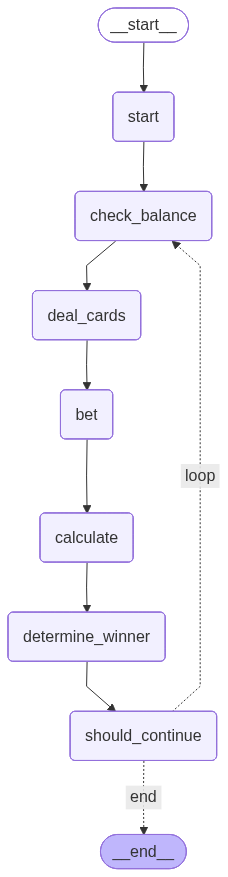

In [2]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))